In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
apt=pd.read_csv("Data/apartment/전국 평균 분양가격(2019.2월).csv",encoding="euc-kr")

In [18]:
apt.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0


In [7]:
apt.shape

(3485, 5)

In [8]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 5 columns):
지역명        3485 non-null object
규모구분       3485 non-null object
연도         3485 non-null int64
월          3485 non-null int64
분양가격(㎡)    3273 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 136.2+ KB


In [13]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

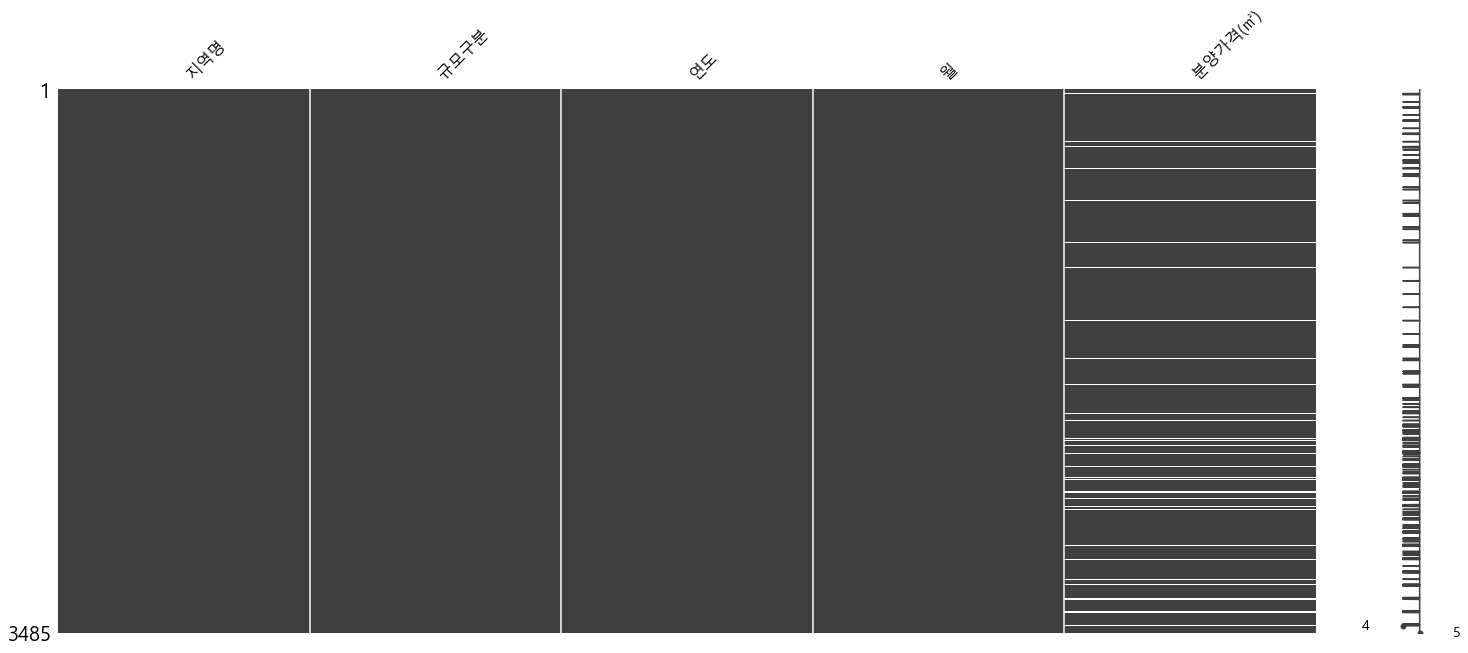

In [14]:
import missingno as msno
msno.matrix(apt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6CAAB6D30>,
      dtype=object)

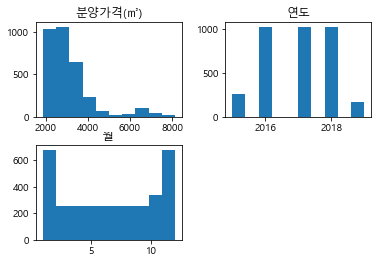

In [17]:
apt.hist(grid=False)

In [22]:
apt.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    212
dtype: int64

In [25]:
apt.dtypes

지역명         object
규모구분        object
연도           int64
월            int64
분양가격(㎡)    float64
dtype: object

In [27]:
apt['연도']=apt['연도'].astype(str)
apt['월']=apt['월'].astype(str)
pre_price=apt['분양가격(㎡)']
apt['분양가격']=pre_price
apt['평당분양가격']=apt['분양가격']*3.3

In [29]:
apt.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)    float64
분양가격       float64
평당분양가격     float64
dtype: object

In [35]:
apt.describe(include=[np.object]) #include로 object까지 표현할 수 있다 

,지역명,규모구분,연도,월
count,3485,3485,3485,3485
unique,17,5,5,12
top,세종,전용면적 102㎡초과,2018,10
freq,205,697,1020,340


In [31]:
apt.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    212
분양가격       212
평당분양가격     212
dtype: int64

In [36]:
year_2017=apt[apt['연도']=='2017']
year_2017.shape

(1020, 7)

In [39]:
apt.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [41]:
apt['규모구분'].value_counts()

전용면적 102㎡초과          697
전체                   697
전용면적 60㎡초과 85㎡이하     697
전용면적 60㎡이하           697
전용면적 85㎡초과 102㎡이하    697
Name: 규모구분, dtype: int64

In [42]:
apt['지역명'].value_counts()

세종    205
인천    205
전남    205
경기    205
경북    205
충북    205
충남    205
부산    205
경남    205
광주    205
강원    205
제주    205
전북    205
대구    205
서울    205
대전    205
울산    205
Name: 지역명, dtype: int64

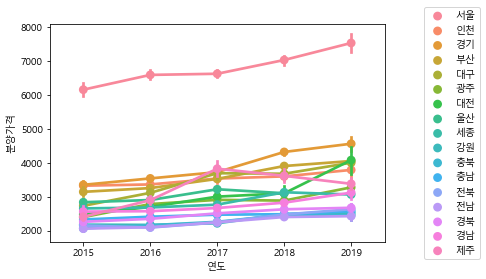

In [54]:
plt.figsize=(8,4)
sns.pointplot(data=apt,x='연도',y='분양가격',hue='지역명').legend(loc='center',bbox_to_anchor=(1.2,0.5))#.legend(loc='center left',bbox_to_anchor=(1,0.5))

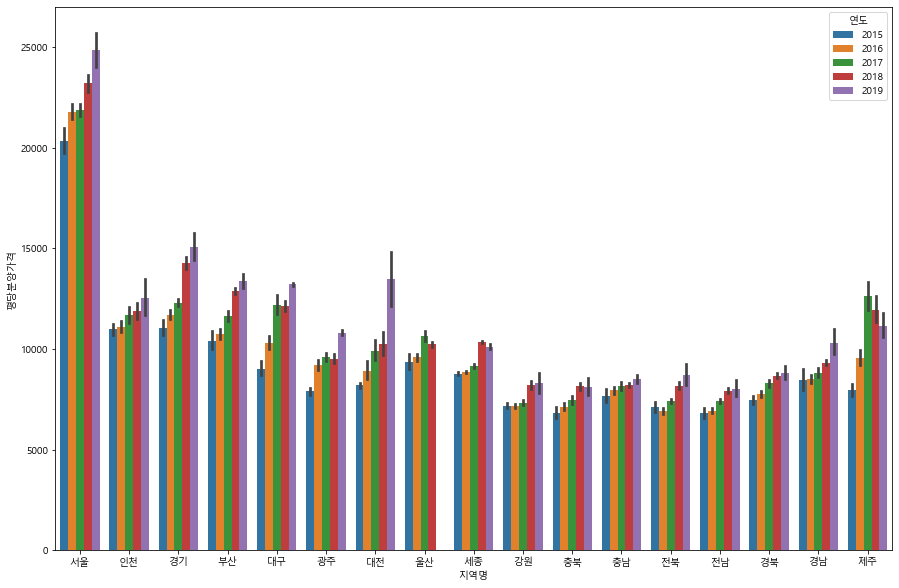

In [65]:
fig,ax=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,10)
sns.barplot(x='지역명',y='평당분양가격',hue='연도',data=apt,ax=ax)

No handles with labels found to put in legend.


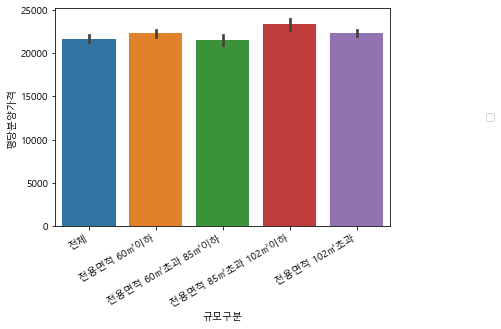

In [85]:
plt.figsize=(20,10)
plt.xticks(rotation=30,ha='right')
sns.barplot(x='규모구분',y='평당분양가격',data=apt[apt['지역명']=='서울']).legend(loc='center',bbox_to_anchor=(1.3,0.5))

In [86]:
apt.pivot_table('평당분양가격','규모구분','지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,7991.312195,14001.336585,9490.880488,8804.721951,10143.870000,12504.665854,14886.300000,12825.168293,22364.421951,9463.675610,9941.250000,13904.237838,7755.965854,8035.580488,10301.797297,8544.987805,8108.824390
전용면적 60㎡이하,7354.895122,12752.085366,8555.370732,7773.914634,8868.658333,11527.463415,8742.134211,11060.473171,22328.202439,9296.813514,8988.565385,10955.678049,7069.485366,7502.590244,14521.703226,7846.273171,7058.217073
전용면적 60㎡초과 85㎡이하,7323.826829,12038.641463,8315.678049,7870.660976,9390.270732,11261.451220,9241.448780,11586.621951,21496.843902,9434.619512,10578.584211,10980.387805,7132.104878,7034.634146,10208.187805,7602.475610,7172.590244
전용면적 85㎡초과 102㎡이하,8090.500000,12834.182927,9864.102439,8778.851613,9296.100000,10214.737500,9077.566667,11523.760976,23404.082927,9437.678049,8861.007692,11262.497561,7938.753659,8049.134211,10717.520000,9023.752941,8294.429268
전체,7302.417073,12053.370732,8353.265854,7877.824390,9383.268293,11236.982927,9304.792683,11679.665854,21686.875610,9429.146341,10559.131579,10873.017073,7150.214634,7055.078049,10437.578049,7598.692683,7128.563415


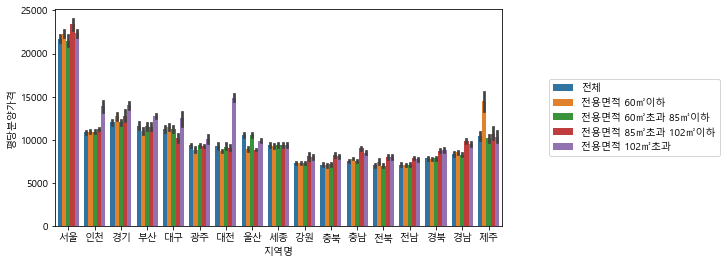

In [91]:
fig,ax=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8,4)
sns.barplot(data=apt,x='지역명',y='평당분양가격',hue='규모구분',ax=ax).legend(loc='right',bbox_to_anchor=(1.5,0.5))

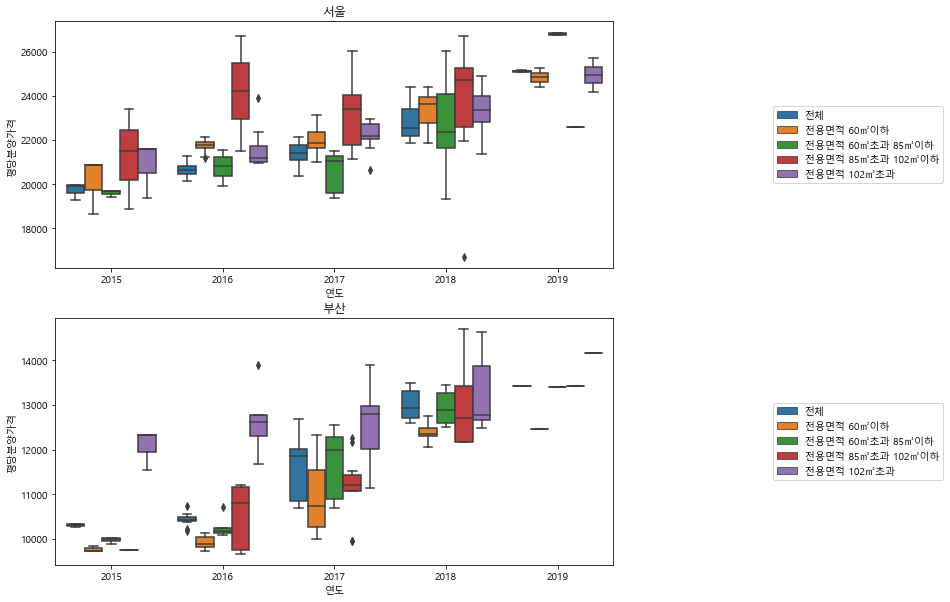

In [134]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,10)
plt.sca(ax1)
plt.title("서울")
sns.boxplot(ax=ax1,x='연도',y='평당분양가격',hue='규모구분',data=apt[(apt['지역명']=='서울')]).legend(loc='right',bbox_to_anchor=(1.6,0.5))
plt.sca(ax2)
plt.title("부산")
sns.boxplot(ax=ax2,x='연도',y='평당분양가격',hue='규모구분',data=apt[(apt['지역명']=='부산')]).legend(loc='right',bbox_to_anchor=(1.6,0.5))